# <font color='brown'> Melanoma Detection using CNN's </font>

## Problem Statement

Melanoma skin cancer is highly curable if it gets identified at the early stages. The first step of Melanoma skin cancer diagnosis is to conduct a visual examination of the skin's affected area. Dermatologists take the dermatoscopic images of the skin lesions by the high-speed camera, which have an accuracy of 65-80% in the melanoma diagnosis without any additional technical support.


A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.


## Objective

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths.


Our aim is to build an automated classification system based on image processing techniques to classify skin cancer using skin lesions images.

## About the Dataset

Dataset Link: https://drive.google.com/file/d/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs/view


The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the **International Skin Imaging Collaboration (ISIC)**. All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following diseases as labeled:

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

## Solution Approach

We have used the following approach to build CNN model that detects the type of disease -

1. Loading and Understanding the Data
2. Dataset Creation
3. Data Visualization
4. Model Experiments
    
    4.1 Base CNN Model
    
    4.2 Data Augmentation + CNN Model

    4.3 Class Balancing + CNN Model
5. Summary

## Importing Necessary Libraries

In [1]:
# Installing Necessary Libraries
!pip install Augmentor -q

In [2]:
# Importing Necessary Libraries
import os
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
import Augmentor
import shutil

## 1. Loading and Understanding the Data

In [3]:
# Downloading and unziping dataset
if not os.path.exists('CNN_assignment.zip'):
    # Downloading dataset using gdown
    !gdown --id 1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs
    # Unzipping the dataset
    !unzip -q CNN_assignment.zip
else:
    print("Dataset already exists")

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs
From (redirected): https://drive.google.com/uc?id=1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs&confirm=t&uuid=9811c6d9-6454-43dc-833a-98d6d579db99
To: /content/CNN_assignment.zip
100% 824M/824M [00:11<00:00, 71.1MB/s]


In [4]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [5]:
# Understanding Data Size
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(f"Train Data Image Count: {image_count_train}")
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(f"Test Data Image Count: {image_count_test}")

Train Data Image Count: 2239
Test Data Image Count: 118


Dataset contains about 2357 images (2239 train + 118 test) of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## 2. Dataset Creation

In [6]:
# Defining parameters for Data Loader
batch_size = 32
img_height = 180
img_width = 180

In [7]:
# Creating Train Dataset
train_ds = image_dataset_from_directory(
                data_dir_train,
                seed=123,
                validation_split = 0.2,
                subset = 'training',
                image_size=(img_height, img_width),
                batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
# Creating Validation Dataset
val_ds = image_dataset_from_directory(
                data_dir_train,
                seed=123,
                validation_split = 0.2,
                subset = 'validation',
                image_size=(img_height, img_width),
                batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# Getting list of class names
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [10]:
# Setting input data procesing parameters
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
# Checking Class Labels Counts in Train Data
image_counts = []
for class_dir in os.listdir(data_dir_train):
    class_path = os.path.join(data_dir_train, class_dir)
    if os.path.isdir(class_path):
        class_images = [img for img in os.listdir(class_path) if img.endswith('.jpg')]
        image_counts.append(len(class_images))
print(image_counts)

[462, 376, 95, 181, 357, 139, 77, 114, 438]


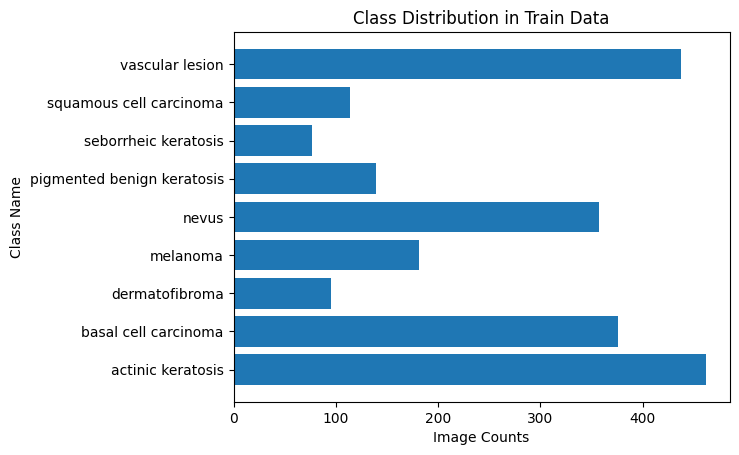

In [12]:
# # Plotting image distribution
plt.barh(class_names, image_counts)
plt.xlabel('Image Counts')
plt.ylabel('Class Name')
plt.title('Class Distribution in Train Data')
plt.show()

**Observation(s)**:

1. It is a Multiclass Classification Problem with 9 unique classlabels
2. Dataset is quite imbalanced, which can be handled before model training
3. *seborrheic keratosis* and *dermatofibroma* diseases have 77 and 95 (less than 100) images respectively
4. *actinic keratosis* has max number of images with count of 462


## 3. Data Visualization

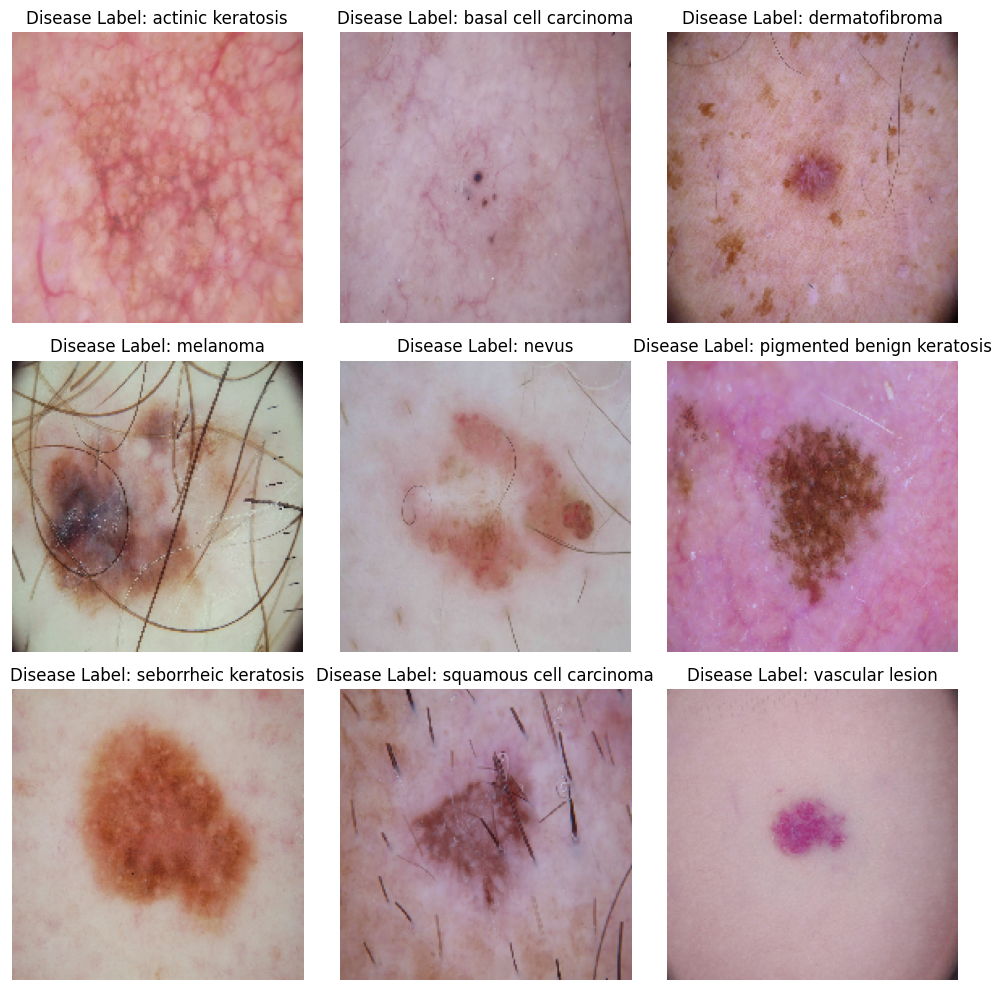

In [13]:
# Visualizing sample of each class label in train data
plt.figure(figsize=(10,10))
index = 0
for c in class_names:
    class_path = os.path.join(data_dir_train, c)
    if os.path.isdir(class_path):
        sample_img = os.path.join(class_path, os.listdir(class_path)[0])
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(sample_img,target_size=(180,180)))
    plt.title(f"Disease Label: {c}")
    plt.axis("off")
plt.tight_layout()
plt.show()

## 4. Model Experiments

### 4.0 Defining reusable utility functions

In [14]:
# Function to plot training results
def plot_training_results(history, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper left')
    plt.title('Training and Validation Loss')
    plt.show()

### 4.1 Base CNN Model

In [15]:
# Defining the CNN model architecture
model_1 = Sequential()

# Rescaling Layer (Input Layer)
model_1.add(Rescaling(1./255,input_shape=(180,180,3)))

# First Convolution layer
model_1.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model_1.add(MaxPool2D(pool_size=(2,2)))

# Second Convolution Layer
model_1.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model_1.add(MaxPool2D(pool_size=(2,2)))

# Third Convolution Layer
model_1.add(Conv2D(32,kernel_size=(2,2),activation='relu'))
model_1.add(MaxPool2D(pool_size=(2,2)))

# Dropout Layer
model_1.add(Dropout(0.2))

# Flatten Layer
model_1.add(Flatten())

# Dense Layer
model_1.add(Dense(128,activation='relu'))

# Dense Layer
model_1.add(Dense(64,activation='relu'))

# Dense Layer
model_1.add(Dense(32,activation='relu'))

# Output Layer
model_1.add(Dense(9,activation='softmax'))

model_1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 42, 42, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 21, 21, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 21, 21, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14112)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,806,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,902,697 (7.26 MB)

 Trainable params: 1,902,697 (7.26 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compiling the Model
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Training the model
epochs = 20
history_1 = model_1.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 179ms/step - accuracy: 0.1648 - loss: 2.1150 - val_accuracy: 0.2125 - val_loss: 2.0014
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.2784 - loss: 1.9171 - val_accuracy: 0.4004 - val_loss: 1.6162
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.4025 - loss: 1.6667 - val_accuracy: 0.4899 - val_loss: 1.5212
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.4898 - loss: 1.5306 - val_accuracy: 0.5078 - val_loss: 1.4420
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.5043 - loss: 1.3788 - val_accuracy: 0.4787 - val_loss: 1.4269
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.5257 - loss: 1.3261 - val_accuracy: 0.5302 - val_loss: 1.3805
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.5251 - loss: 1.2856 - val_accuracy: 0.4877 - val_loss: 1.4936
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.5456 - loss: 1.2733 - val_accuracy: 0.5369 -

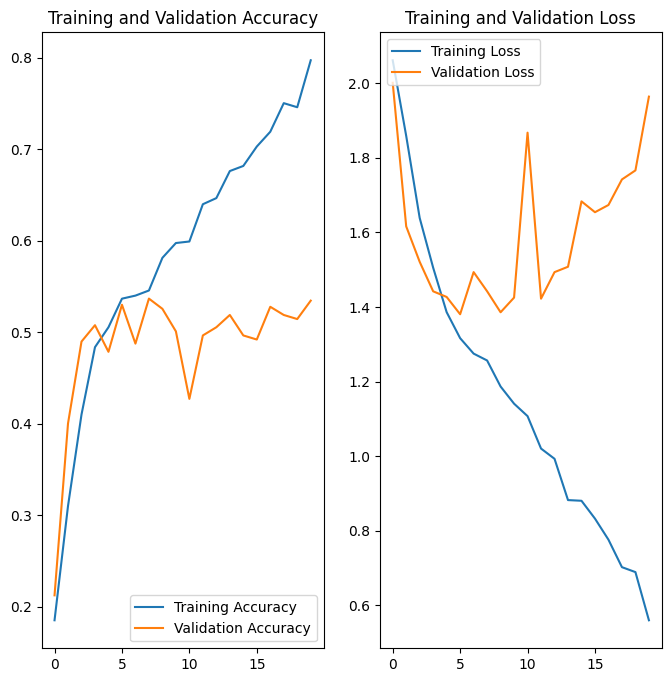

In [18]:
# Checking Training Plots
plot_training_results(history_1, epochs)

In [19]:
# Evaluating Model Performance
train_loss, train_acc = model_1.evaluate(train_ds, verbose=0)
print(f"Train Loss: {round(train_loss, 2)}, Train Accuracy: {round(train_acc, 2)}")
val_loss, val_acc = model_1.evaluate(val_ds, verbose=0)
print(f"Validation Loss: {round(val_loss,2)}, Validation Accuracy: {round(val_acc,2)}")

Train Loss: 0.43, Train Accuracy: 0.83
Validation Loss: 1.96, Validation Accuracy: 0.53


**Observation(s):**

1. Large difference between training and validation accuracy indicates that **model is overfitting**

2. Validation loss first decreasea and then increases again while training loss decreases gradually indicating strong **overfitting on train data**

### 4.2 Data Augmentation + CNN Model

In [20]:
# Defining parameters for Data Loader
batch_size = 32
img_height = 180
img_width = 180

In [21]:
# Creating Data Augmentation Dataset using Keras
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal', input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])

In [22]:
# Creating Train Dataset
train_ds = image_dataset_from_directory(
                data_dir_train,
                seed=123,
                validation_split = 0.2,
                subset = 'training',
                image_size=(img_height, img_width),
                batch_size=batch_size)

# Creating Validation Dataset
val_ds = image_dataset_from_directory(
                data_dir_train,
                seed=123,
                validation_split = 0.2,
                subset = 'validation',
                image_size=(img_height, img_width),
                batch_size=batch_size)

# Apply data augmentation using map
train_ds_aug = train_ds.map(lambda x, y: (data_augmentation(x), y))

# Setting input data procesing parameters
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds_aug = train_ds_aug.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [23]:
# Defining the CNN model architecture
model_2 = Sequential()

# Rescaling Layer (Input Layer)
model_2.add(Rescaling(1./255,input_shape=(180,180,3)))

# First Convolution layer
model_2.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))

# Second Convolution Layer
model_2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))

# Third Convolution Layer
model_2.add(Conv2D(32,kernel_size=(2,2),activation='relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))

# Dropout Layer
model_2.add(Dropout(0.2))

# Flatten Layer
model_2.add(Flatten())

# Dense Layer
model_2.add(Dense(128,activation='relu'))

# Dense Layer
model_2.add(Dense(64,activation='relu'))

# Dense Layer
model_2.add(Dense(32,activation='relu'))

# Output Layer
model_2.add(Dense(9,activation='softmax'))

model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 42, 42, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 21, 21, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 21, 21, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14112)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,806,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,902,697 (7.26 MB)

 Trainable params: 1,902,697 (7.26 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compiling the Model
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# Training the model
epochs = 20
history_2 = model_2.fit(train_ds_aug, validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 160ms/step - accuracy: 0.1378 - loss: 2.1318 - val_accuracy: 0.2148 - val_loss: 2.0221
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.1986 - loss: 2.0158 - val_accuracy: 0.3199 - val_loss: 1.8960
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.2944 - loss: 1.8646 - val_accuracy: 0.3468 - val_loss: 1.8433
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.3527 - loss: 1.7748 - val_accuracy: 0.4206 - val_loss: 1.7187
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.3891 - loss: 1.6518 - val_accuracy: 0.4653 - val_loss: 1.5191
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.4674 - loss: 1.5057 - val_accuracy: 0.4989 - val_loss: 1.4472
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.4852 - loss: 1.4213 - val_accuracy: 0.4385 - val_loss: 1.6235
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.5030 - loss: 1.4183 - val_accuracy: 0.4966 

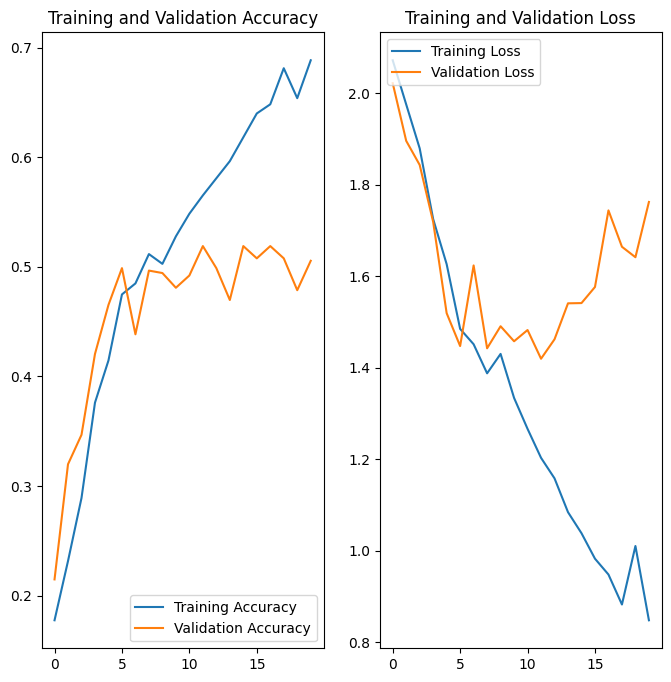

In [26]:
# Checking Training Plots
plot_training_results(history_2, epochs)

In [27]:
# Evaluating Model Performance
train_loss, train_acc = model_2.evaluate(train_ds_aug, verbose=0)
print(f"Train Loss: {round(train_loss, 2)}, Train Accuracy: {round(train_acc, 2)}")
val_loss, val_acc = model_2.evaluate(val_ds, verbose=0)
print(f"Validation Loss: {round(val_loss,2)}, Validation Accuracy: {round(val_acc,2)}")

Train Loss: 0.64, Train Accuracy: 0.79
Validation Loss: 1.76, Validation Accuracy: 0.51


**Observation(s):**

1. Model learns for first five epochs and then loss increases
2. Significant difference between training and validation accuracy shows model is still overfitting
3. Keras augmentation did not resolve overfitting issue

### 4.3 Class Balancing + CNN Model

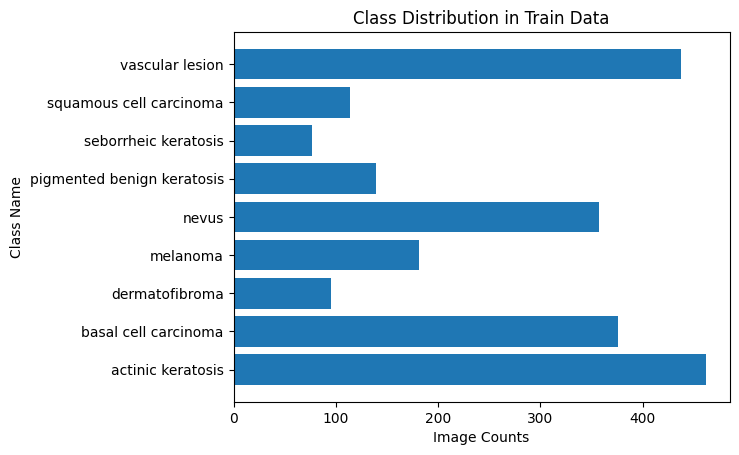

In [28]:
# # Plotting image distribution
plt.barh(class_names, image_counts)
plt.xlabel('Image Counts')
plt.ylabel('Class Name')
plt.title('Class Distribution in Train Data')
plt.show()

**Observation(s):**

1. Max image count is around 462 for *actinic keratosis*
2. We can create around 500 images for each class using aumentor library and retrain our model

In [29]:
# Augmented data dir path
aug_train_data_dir = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")

In [30]:
# Handling class imbalance using Augmentor
for i in class_names:
    p = Augmentor.Pipeline(os.path.join(aug_train_data_dir, i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79600797A950>: 100%|██████████| 500/500 [00:17<00:00, 27.92 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x796007939610>: 100%|██████████| 500/500 [00:14<00:00, 34.96 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x795FB7FFB250>: 100%|██████████| 500/500 [00:14<00:00, 34.56 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7960001C8F90>: 100%|██████████| 500/500 [01:21<00:00,  6.16 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7960079D3850>: 100%|██████████| 500/500 [01:08<00:00,  7.30 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x79600F702690>: 100%|██████████| 500/500 [00:15<00:00, 33.01 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x79600025AC90>: 100%|██████████| 500/500 [00:36<00:00, 13.84 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x796007980D50>: 100%|██████████| 500/500 [00:14<00:00, 34.25 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7960002D5110>: 100%|██████████| 500/500 [00:15<00:00, 33.20 Samples/s]


In [31]:
# Getting count of augmented images
image_count_train = len(list(aug_train_data_dir.glob('*/output/*.jpg')))
print(f"Augmented image count: {image_count_train}")

Augmented image count: 4500


In [32]:
# Moving generated files from output folder to respective class label folder
for class_name in class_names:
    output_fp = f'Skin cancer ISIC The International Skin Imaging Collaboration/Train/{class_name}/output'
    class_fp = f'Skin cancer ISIC The International Skin Imaging Collaboration/Train/{class_name}'

    # Removing existing files
    for filename in os.listdir(class_fp):
        if filename.endswith('.jpg'):
            os.remove(os.path.join(class_fp, filename))

    # Moving files to class label dir
    for filename in os.listdir(output_fp):
        if filename.endswith('.jpg'):
            # Move the file to the target directory
            shutil.move(os.path.join(output_fp, filename), os.path.join(class_fp, filename))
    os.rmdir(output_fp)

In [33]:
# Defining parameters for Data Loader
batch_size = 32
img_height = 180
img_width = 180

In [34]:
# Creating Train Dataset
train_ds_os = image_dataset_from_directory(
                aug_train_data_dir,
                seed=123,
                validation_split = 0.2,
                subset = 'training',
                image_size=(img_height, img_width),
                batch_size=batch_size)

# Creating Validation Dataset
val_ds_os = image_dataset_from_directory(
                aug_train_data_dir,
                seed=123,
                validation_split = 0.2,
                subset = 'validation',
                image_size=(img_height, img_width),
                batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.
Found 4500 files belonging to 9 classes.
Using 900 files for validation.


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
[500, 500, 500, 500, 500, 500, 500, 500, 500]


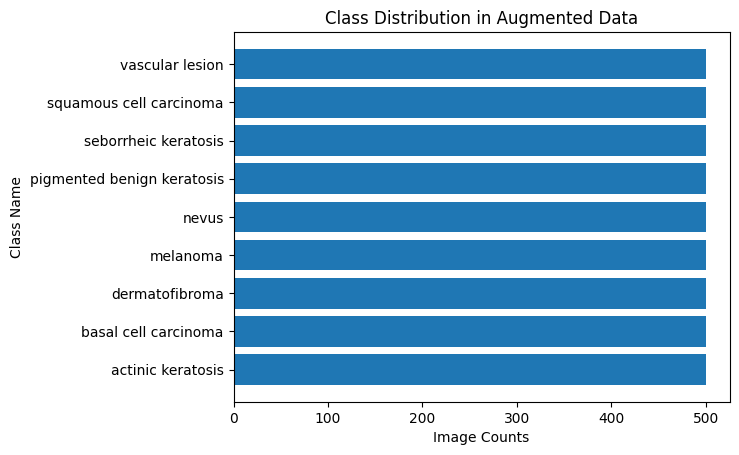

In [35]:
# Getting list of class names
class_names = train_ds.class_names
print(class_names)

# Checking Class Labels Counts in Train Data
image_counts = []
for class_dir in os.listdir(data_dir_train):
    class_path = os.path.join(data_dir_train, class_dir)
    if os.path.isdir(class_path):
        class_images = [img for img in os.listdir(class_path) if img.endswith('.jpg')]
        image_counts.append(len(class_images))
print(image_counts)

# # Plotting image distribution
plt.barh(class_names, image_counts)
plt.xlabel('Image Counts')
plt.ylabel('Class Name')
plt.title('Class Distribution in Augmented Data')
plt.show()

In [36]:
# Setting input data procesing parameters
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds_os = train_ds_os.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_os = val_ds_os.cache().prefetch(buffer_size=AUTOTUNE)

In [37]:
# Defining the CNN model architecture
model_3 = Sequential()

# Rescaling Layer (Input Layer)
model_3.add(Rescaling(1./255,input_shape=(180,180,3)))

# First Convolution layer
model_3.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model_3.add(MaxPool2D(pool_size=(2,2)))

# Second Convolution Layer
model_3.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model_3.add(MaxPool2D(pool_size=(2,2)))

# Third Convolution Layer
model_3.add(Conv2D(32,kernel_size=(2,2),activation='relu'))
model_3.add(MaxPool2D(pool_size=(2,2)))

# Dropout Layer
model_3.add(Dropout(0.2))

# Flatten Layer
model_3.add(Flatten())

# Dense Layer
model_3.add(Dense(128,activation='relu'))

# Dense Layer
model_3.add(Dense(64,activation='relu'))

# Dense Layer
model_3.add(Dense(32,activation='relu'))

# Output Layer
model_3.add(Dense(9,activation='softmax'))

model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 178, 178, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 89, 89, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 87, 87, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 42, 42, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 21, 21, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 21, 21, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14112)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       1,806,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,902,697 (7.26 MB)

 Trainable params: 1,902,697 (7.26 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Compiling the Model
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
# Training the model
epochs = 20
history_3 = model_3.fit(train_ds_os, validation_data=val_ds_os, epochs=epochs)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 28s 112ms/step - accuracy: 0.1183 - loss: 2.2024 - val_accuracy: 0.1244 - val_loss: 2.1810
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.1998 - loss: 2.0820 - val_accuracy: 0.2978 - val_loss: 1.7501
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.3829 - loss: 1.6165 - val_accuracy: 0.4556 - val_loss: 1.4167
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.4567 - loss: 1.4302 - val_accuracy: 0.4300 - val_loss: 1.5482
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.4923 - loss: 1.3621 - val_accuracy: 0.5500 - val_loss: 1.2035
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.5458 - loss: 1.2035 - val_accuracy: 0.5633 - val_loss: 1.2045
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.5972 - loss: 1.0947 - val_accuracy: 0.5711 - val_loss: 1.1815
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.6312 - loss: 1.0175 - val_

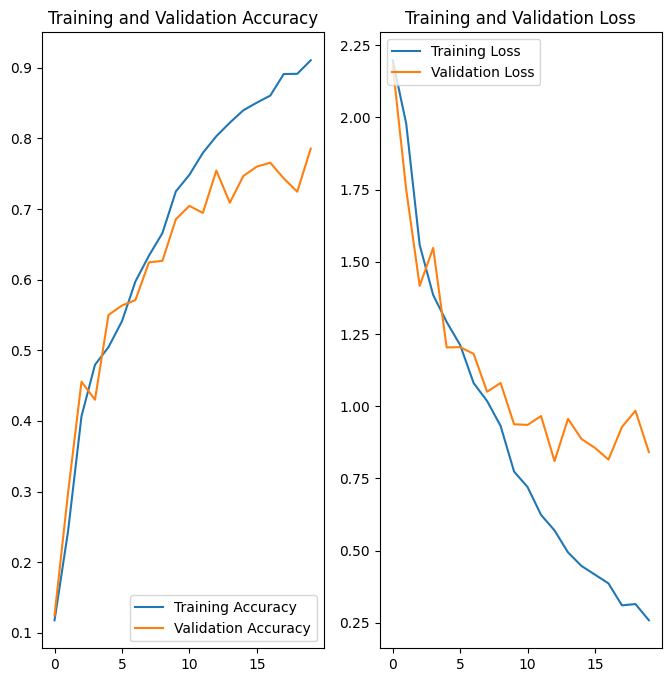

In [40]:
# Checking Training Plots
plot_training_results(history_3, epochs)

In [41]:
# Evaluating Model Performance
train_loss, train_acc = model_3.evaluate(train_ds_os, verbose=0)
print(f"Train Loss: {round(train_loss, 2)}, Train Accuracy: {round(train_acc, 2)}")
val_loss, val_acc = model_3.evaluate(val_ds_os, verbose=0)
print(f"Validation Loss: {round(val_loss,2)}, Validation Accuracy: {round(val_acc,2)}")

Train Loss: 0.2, Train Accuracy: 0.93
Validation Loss: 0.84, Validation Accuracy: 0.79


**Observation(s)**:

1. After data augmentation using augmentor there is lower difference between validation and training accuracy, indicating lower overfitting
2. Validation Loss decreased and validation accuracy increased after class balancing using augmentor
3. Use of Augmentor library for class balancing reduced the extent of overfitting and also improved the learning ability of the model.

## 5. Summary

In [43]:
# Summarizing model experiments in tabular form
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Model Experiment", "Train Loss", "Train Accuracy", "Validation Loss", "Validation Accuracy"]
table.add_row(["Base CNN Model", 0.43, 0.83, 1.96, 0.53])
table.add_row(["CNN Model + Keras Augmentor", 0.64, 0.79, 1.76, 0.51])
table.add_row(["Class Balancing (Augmentor) + CNN Model", 0.2, 0.93, 0.84, 0.79])

print(table)

+-----------------------------------------+------------+----------------+-----------------+---------------------+
|             Model Experiment            | Train Loss | Train Accuracy | Validation Loss | Validation Accuracy |
+-----------------------------------------+------------+----------------+-----------------+---------------------+
|              Base CNN Model             |    0.43    |      0.83      |       1.96      |         0.53        |
|       CNN Model + Keras Augmentor       |    0.64    |      0.79      |       1.76      |         0.51        |
| Class Balancing (Augmentor) + CNN Model |    0.2     |      0.93      |       0.84      |         0.79        |
+-----------------------------------------+------------+----------------+-----------------+---------------------+


**Conlusion(s):**

1. Use of Augmentor library for class balancing not only improved the model performance but also reduced overfitting issue.
2. Thus having higher number of images per class lable is better for model training.
3. Use of augmentation techniques like rotation, flipping, zoom etc. helps in making the model more robust.